## DAT_12_SF Midterm
____________________--

### About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 



Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

###Definitions of the attributes: 
_______________-

####48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

####6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

####1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

####1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

In [444]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',70)

%matplotlib inline

In [445]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
df = pd.read_csv("spambase.csv")
#df.head(10).T

In [446]:
df.is_spam.value_counts()

0    2788
1    1813
dtype: int64

We have no null values or misisng values. Nice!!!!!!
Most of the variables are float type, except 3 variables which are int type.

In [447]:
# For all columns, split their rows into 2 groups
# when spam = 0 (not spam) and when spam = 1 (is spam)
# then calculate means 2 groups for every column
df_mean=df.groupby('is_spam').mean()

In [448]:
# Let's briefly look at the means to get a rough idea if the means indicate any explanations
df_mean.head().T

is_spam,0,1
word_freq_make,0.073479,0.152339
word_freq_address,0.244466,0.164650
word_freq_all,0.200581,0.403795
word_freq_3d,0.000886,0.164672
word_freq_our,0.181040,0.513955
word_freq_over,0.044544,0.174876
word_freq_remove,0.009383,0.275405
word_freq_internet,0.038415,0.208141
word_freq_order,0.038049,0.170061
word_freq_mail,0.167170,0.350507


We can see that the difference in mean for certain features as 'caps_ave' (104.3 when spam = 0 vs 18.21 when spam= 1) is quite high. However we need a measure where we can compare all the variables, we can try calculating the proportion of the difference in mean.

In [449]:
# find the proportionate difference of means for all columns when spam =0 vs when spam=1
# this will give us an idea which features are more likely an indicator of spam
df_mean.ix['diff']=df_mean.ix[1]/(df_mean.ix[1]+df_mean.ix[0])

# print top 10 variables which have highest difference in mean
df_mean.ix['diff'].order(ascending=False)[:10]

word_freq_3d                  0.994649
word_freq_000                 0.972112
word_freq_remove              0.967052
word_freq_credit              0.964435
char_freq_$                   0.937416
word_freq_addresses           0.930914
word_freq_money               0.925494
word_freq_free                0.875687
word_freq_business            0.856049
capital_run_length_longest    0.851441
Name: diff, dtype: float64

Now we have a rough idea of which features might be useful for classifying spam.

However we want to see how these features are distributed among all the rows, we don't want to pick features that occur rarely and hence might not be a good bet for us to use for prediction.

Features with word_freq and char_freq are measured as occurences, features with capital_ are measured as length. We might be better off looking at distributions of occurences and lengths on different set of histograms.

In [450]:
# we already know caps_longest is likely to be a good indicator of spam.
# lets see how the three variables CAPS longest, average, total vary along the 4,600 emails

# let's first rearrange these three variables to the front of the dataframe so we can see
cols = df.columns.tolist()
cols = cols[-4:] + cols[:-4]
df = df[cols]
df.head(2)

,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#
0,3.756,61,278,1,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0,0.778,0.00,0.000
1,5.114,101,1028,1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0,0,0,0,0,0,0,0,0,0,0.132,0,0.372,0.18,0.048


###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other


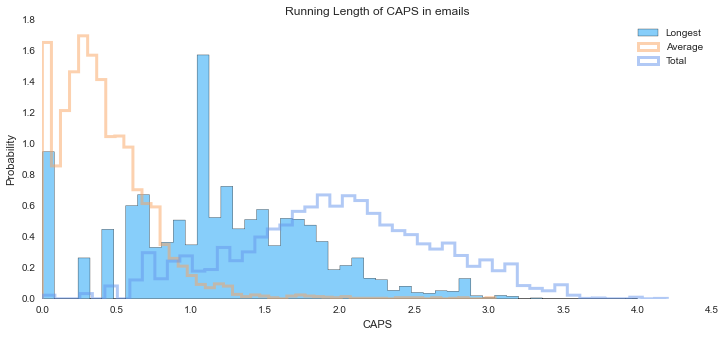

In [451]:
# let's plot the distribution of CAPS longest, average and total along the 4,600 emails

plt.figure(figsize=(12,5))
plt.hist(np.log10(df.capital_run_length_longest), bins=50, histtype='stepfilled', normed=True, color='lightskyblue', label='Longest')
plt.hist(np.log10(df.capital_run_length_average), bins=50, histtype='step',  normed=True, color='sandybrown', linewidth=3, alpha=0.5, label='Average')
plt.hist(np.log10(df.capital_run_length_total), bins=50, histtype='step',  normed=True, color='cornflowerblue', linewidth=3, alpha=0.5, label='Total')
plt.title("Running Length of CAPS in emails")
plt.xlabel("CAPS")
plt.ylabel("Probability")
plt.legend()
plt.show()

From this visualization we can say that the features, CAPS longest, average and total
can be considered as our first choice to build a simple model.

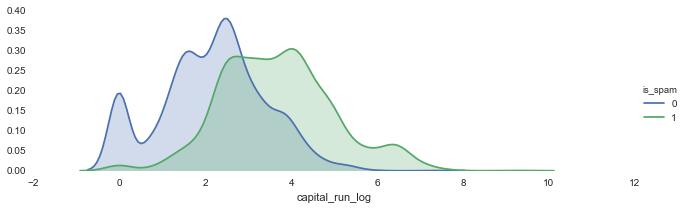

In [452]:
# Let's take a closer look at capital_run_length_longest 
# log scale 
df['capital_run_log'] = np.log(df.capital_run_length_longest)
fg = sns.FacetGrid(df, hue="is_spam", aspect=3)
fg.map(sns.kdeplot, "capital_run_log", shade=True)
fg.add_legend()

We can see that as caps_length increases its more likely that spam is true. 

However, this doesnt help us have a lot of insight.

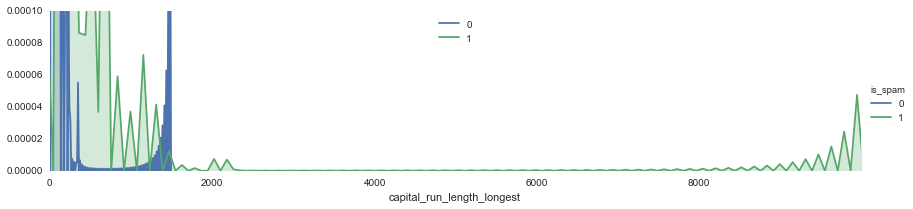

In [453]:
# actual scale (not log)
fg = sns.FacetGrid(df, hue="is_spam", aspect=4)
fg.map(sns.kdeplot, "capital_run_length_longest", shade=True)
fg.set(xlim=(df.capital_run_length_longest.min(), df.capital_run_length_longest.max()))
fg.set(ylim=(0,0.0001))
fg.add_legend()
plt.legend(loc='upper center')

Oh wow!!! we got lucky, we can see clearly that when capital_run_length_longest > ~1600 its almost always spam. 

Note: 0 is not spam and 1 is spam in the above plot.

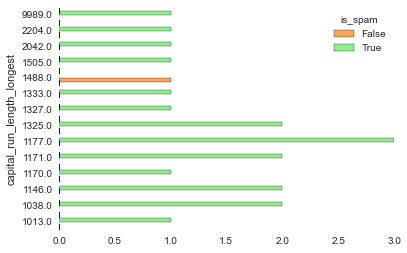

In [454]:
# Just to be sure let's make one more plot with capital_run_length_longest > 1000
df_sub = pd.crosstab(df.capital_run_length_longest[df.capital_run_length_longest>1000],df.is_spam.astype(bool))
df_sub
df_sub.plot(kind='barh', stacked=False, color=['sandybrown','lightgreen'], grid=False)

Alright, there are a few emails(not spam) where caps_longest is ~ 1488. Greater than 1500 , always spam.

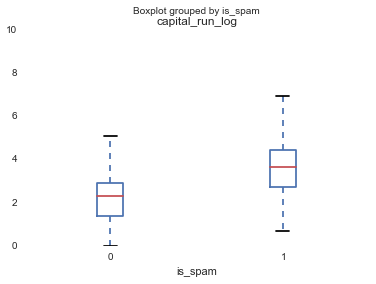

In [455]:
# Looking at mean and limits at the same time
df.boxplot('capital_run_log', by='is_spam')

###Exercise 2: Build a simple logistic regression and visualize it

use the variable "capital_run_length_longest" to predict "is_spam"
How accurate is this single feature?

In [456]:
import statsmodels.formula.api as smf
import statsmodels as sm
train_cols = df.columns[2]
logit = smf.Logit(df["is_spam"], df[train_cols])
results=logit.fit()
print results.summary()

Optimization terminated successfully.
         Current function value: 0.682696
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                is_spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4600
Method:                           MLE   Df Model:                            0
Date:                Wed, 18 Mar 2015   Pseudo R-squ.:                -0.01815
Time:                        17:36:23   Log-Likelihood:                -3141.1
converged:                       True   LL-Null:                       -3085.1
                                        LLR p-value:                     1.000
                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
capital_run_length_total     0.0005   6.21e-05      8.757      0.000         0.0

From 'The elements of statistical analysis':
Z scores for each of the coefficients in the model (coefficients divided by their standard errors); a nonsignificant Z score suggests a coefficient can be dropped from the model.A Z score greater than approximately 2 in absolute value is significant at the 5% level.

The variable "capital_run_length_longest" has Z valued 8.7, significant for our analysis.

### Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [457]:
# place column to be predicted(is_spam) in a different dataframe for sklearn
df_y = df['is_spam']
df = df.drop(['is_spam'],axis=1)
X = df
y = df_y

In [458]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=12)
y = np.ravel(y)

In [459]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lg2 = LogisticRegression()
lg2.fit(X_train, y_train)
y_pred = lg2.predict(X_test)
probs = lg2.predict_proba(X_test)
print "Accuracy:", metrics.accuracy_score(y_test, y_pred)
print "Roc_auc_score:", metrics.roc_auc_score(y_test, probs[:, 1])
print "Classification report:\n", metrics.classification_report(y_test, y_pred, target_names=['spam', 'Not spam'])

Accuracy: 0.929761042723
Roc_auc_score: 0.971111555822
Classification report:
             precision    recall  f1-score   support

       spam       0.94      0.94      0.94       855
   Not spam       0.91      0.91      0.91       526

avg / total       0.93      0.93      0.93      1381



For this problem not all errors are equal; we want to avoid filtering out
good email. Letting spam get through is not desirable but less serious in its consequences.

From http://scikit-learn.org/stable/auto_examples/plot_precision_recall.html

Precision = true positives/(true positives + false positives)
High precision relates to a low false positive rate 
For class spam=1, we want high precision(avoid filtering out good email). We might have to trade off with low precision for class spam = 0 (Letting spam get through is not desirable but less serious in its consequences)
 

In [460]:
# We can look at this in a more resourceful way with confusion matrix
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

def confusion_matrix(y_test, y_pred):
    cm = sk_confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm.columns.name = 'Predicted label'
    cm.index.name = 'True label'
    error_rate = (y_pred != y_test).mean()
    return cm

print "Confusion Matrix:\n\n", confusion_matrix(y_test, y_pred)


Confusion Matrix:

Predicted label    0    1
True label               
0                806   49
1                 48  478


Here we can see that out of (806+49) emails we are predicting 806 as emails and 49 as spam. Not a satisfactory prediction accuracy for our application.

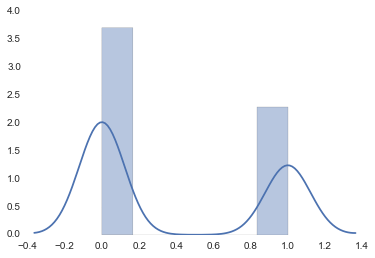

In [461]:
sns.distplot(y_pred)

###Exercise 4: Apply Crossvalidation to see how the model fares across different splits of your date

#### Use crossvalidation to score model

In [462]:
# evaluate the model using 10-fold cross-validation
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LogisticRegression(), X_train, y_train, scoring='precision', cv=10)
print "Cross Validation Scores for %i splits of data:\n " %cv
np.set_printoptions(precision=3)
print scores
print "\nMean of scores:%.3f" %scores.mean()

Cross Validation Scores for 10 splits of data:
 
[ 0.908  0.901  0.917  0.926  0.876  0.952  0.924  0.915  0.934  0.927]

Mean of scores:0.918


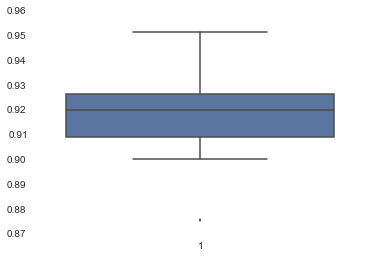

In [463]:
sns.boxplot(scores)

Not huge variation between splits, not unbalanced data.

### Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
-Which model is more accurate?

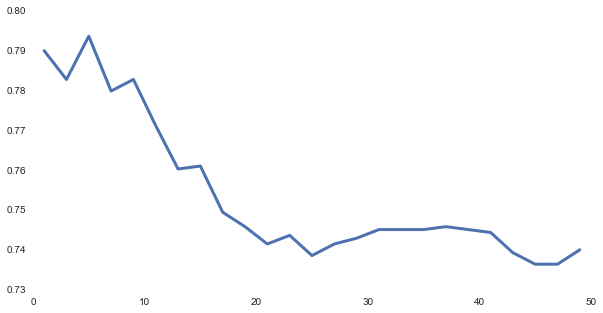

In [464]:
from sklearn import neighbors, feature_selection

n_neighbors = range(1, 51, 2)
scores = []

for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10,5))
_ = plt.plot(n_neighbors, scores, linewidth=3.0)

Optimal k for our model should be in the range of 3 to 7

In [465]:
clf = neighbors.KNeighborsClassifier(3, weights='uniform')
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [466]:
y_pred = clf.predict(X_test)
print "Accuracy:", metrics.accuracy_score(y_test, y_pred)
print "\nClassification report:\n", metrics.classification_report(y_test, y_pred)
print "\nConfusion matrix:\n\n", confusion_matrix(y_test, y_pred)

Accuracy: 0.782766111513

Classification report:
             precision    recall  f1-score   support

          0       0.83      0.82      0.82       855
          1       0.71      0.72      0.72       526

avg / total       0.78      0.78      0.78      1381


Confusion matrix:

Predicted label    0    1
True label               
0                701  154
1                146  380


Logistic regression achieved 93% accuracy while Knn model with 3 neighbors achieved 78% accuracy. I have tried by changing K value and the maximum accuracy achieved is with k=5, a 79% accuracy, this is still far lower than logistic regression model.

KNN is a model that works on finding groups by distance between the group and distance away from the next group, it is possible without scaling the data before fitting, knn cannot achieve high accuracy as Logistic regression.

### Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

In [467]:
#Below code to perform feature importance is adapted from 
#http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)

importances = forest.feature_importances_
fea_names = list(X)

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking in the order of importance(1 being higher):\n")

for f in range(10):
    #print("%d. Feature %d %s (%f)" % (f + 1, indices[f], fea_names[indices[f]], importances[indices[f]]))
    print("%d. %s (%f)" % (f + 1, fea_names[indices[f]], importances[indices[f]]))



Feature ranking in the order of importance(1 being higher):

1. capital_run_log (0.095848)
2. word_freq_your (0.061282)
3. word_freq_remove (0.049542)
4. char_freq_! (0.045380)
5. char_freq_$ (0.041337)
6. word_freq_hp (0.040071)
7. word_freq_free (0.038978)
8. word_freq_you (0.033330)
9. capital_run_length_longest (0.032693)
10. word_freq_000 (0.032211)


'capital_run_log' is a new column we created which is log transformation of the 'column capital_length_longest'. Model prediction capacity might have benefited if we did log transformation on all the features, considering distribution of most of the features have long tails.

### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [477]:
#code for plotting roc curve is adapted from 
#http://nbviewer.ipython.org/github/ga-students/DAT_SF_5/blob/master/iPython%20notebooks/DAT5-lab07-Sol.ipynb)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(target_test, target_predicted_proba):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

In [478]:
target_predicted_proba = lg2.predict_proba(X_test)

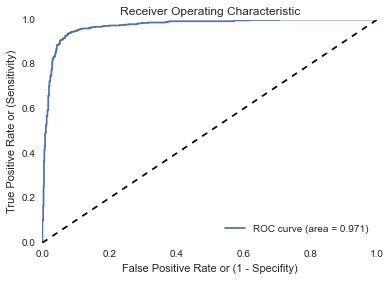

In [470]:
plot_roc_curve(y_test, target_predicted_proba)

### Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [471]:
target_predicted_proba[:5]

array([[  2.093e-03,   9.979e-01],
       [  9.990e-01,   9.798e-04],
       [  1.000e+00,   4.339e-26],
       [  1.000e+00,   1.880e-12],
       [  7.893e-01,   2.107e-01]])

In [472]:
# let's try changing threshold to 80%
alter_threshold = 0.95
threshold_other = [ ]

# we are assuming default threshold is 50%
def_threshold = 0.5
threshold_50 = [ ]


# classifying probabilities with threshold 80%
for i in range(len(target_predicted_proba)):
    if target_predicted_proba[i][1] > alter_threshold:
        threshold_other.append(1)
    else:
        threshold_other.append(0)
        

# classifying probabilities with threshold 50%
for i in range(len(target_predicted_proba)):
    if target_predicted_proba[i][1] > def_threshold:
        threshold_50.append(1)
    else:
        threshold_50.append(0)
        
               

In [473]:
y_pred_other = np.array(threshold_other)
y_pred_other[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [474]:
y_pred[:10]

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [475]:
tpr_other = float(sum(threshold_other))/len(threshold_50)
print "\nProportion of true positives when threshold is %.2f:   %.3f"%(alter_threshold,tpr_other)

tpr_50 = float(sum(threshold_50))/len(threshold_50)
print "Proportion of true positives when threshold is %.2f:   %.3f\n"%(def_threshold,tpr_50)


Proportion of true positives when threshold is 0.95:   0.198
Proportion of true positives when threshold is 0.50:   0.382



In [476]:
print "At threshold %.2f:  "%(alter_threshold)
print metrics.classification_report(y_test, y_pred_other)
print "\nConfusion matrix:\n\n", confusion_matrix(y_test, y_pred_other)

print "\n--------------------------------------------------------\n"

print "At default threshold:"
print metrics.classification_report(y_test, y_pred)
print "\nConfusion matrix:\n\n",confusion_matrix(y_test, y_pred)


At threshold 0.95:  
             precision    recall  f1-score   support

          0       0.76      0.99      0.86       855
          1       0.97      0.50      0.66       526

avg / total       0.84      0.80      0.79      1381


Confusion matrix:

Predicted label    0    1
True label               
0                846    9
1                262  264

--------------------------------------------------------

At default threshold:
             precision    recall  f1-score   support

          0       0.83      0.82      0.82       855
          1       0.71      0.72      0.72       526

avg / total       0.78      0.78      0.78      1381


Confusion matrix:

Predicted label    0    1
True label               
0                701  154
1                146  380


###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea? 

At defualt threshold 
    - we wrongly classified 154 emails as spam (please see above confusion matrix)

As we changed threshold to 95% 
    - we reduced mis classification of emails as spam from 154 to 9.

For this particular application higher threshold values are more applicable.
  

Context for how other scores changed when threshold is increased: 
(from scikit learn)

Precision = true positives/(true positives + false positives)
Recall = true positives/(true positives + false negatives)

The definition of precision shows that lowering the threshold of a classifier may increase the denominator, by increasing the number of results returned. If the threshold was previously set too high, the new results may all be true positives, which will increase precision. If the previous threshold was about right or too low, further lowering the threshold will introduce false positives, decreasing precision.

For recall, lowering the classifier threshold may increase recall, by increasing the number of true positive results. It is also possible that lowering the threshold may leave recall unchanged, while the precision fluctuates.

###Bonus: Apply PCA to the features and visualize the data in two dimensions: 

In [302]:
from sklearn.decomposition import RandomizedPCA

rpca = RandomizedPCA(n_components=150,whiten = True)

X_pca_train = rpca.fit_transform(X_train)
X_pca_test = rpca.transform(X_test)

lg2_pca = LogisticRegression()
lg2_pca.fit(X_pca_train, y_train)

y_pca_pred = lg2_pca.predict(X_pca_test)
probs_pca = lg2_pca.predict_proba(X_pca_test)

print "AFTER APPLYING PCA \n"

print "Accuracy:", metrics.accuracy_score(y_test, y_pca_pred)
print "Classification report:\n", metrics.classification_report(y_test, y_pca_pred, target_names=['spam', 'Not spam'])

print "\n--------------------------------------------------------\n"

print "BEFORE APPLYING PCA \n"
print "Accuracy:", metrics.accuracy_score(y_test, y_pred)
print "Classification report:\n", metrics.classification_report(y_test, y_pred, target_names=['spam', 'Not spam'])

AFTER APPLYING PCA 

Accuracy: 0.925416364953
Classification report:
             precision    recall  f1-score   support

       spam       0.94      0.95      0.94       855
   Not spam       0.91      0.89      0.90       526

avg / total       0.93      0.93      0.93      1381


--------------------------------------------------------

BEFORE APPLYING PCA 

Accuracy: 0.782766111513
Classification report:
             precision    recall  f1-score   support

       spam       0.83      0.82      0.82       855
   Not spam       0.71      0.72      0.72       526

avg / total       0.78      0.78      0.78      1381



PCA improved overall accuracy, also did a great job improving both precision and recall 

In [518]:
# Look at Total Information captured in the Principal Components
rpca.explained_variance_ratio_.sum()

0.99999999999999545

In [303]:
from itertools import cycle


def plot_PCA_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    print target_ids
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    plt.legend()

<Container object of 58 artists>

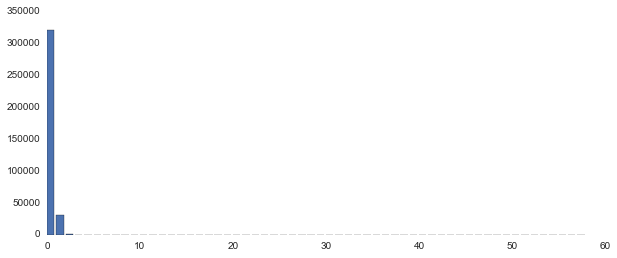

In [306]:
rpca_components = len(rpca.explained_variance_ratio_)
plt.figure(figsize=(10, 4))
plt.bar(range(rpca_components), rpca.explained_variance_)

[0, 1]


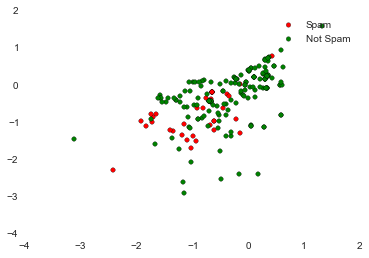

In [516]:
labels=['Spam','Not Spam']
plot_PCA_2D(np.log10(X_pca_train), y_train, labels)